# Energy model of AN in connnected channels

This notebook is for presenting important predictions by Woodhouse and Dunkel 2017.
The theory starts with a Hamiltonian
$$
H_0 = \lambda\sum_{e\in E} V(\phi_e) + \frac{1}{2}\mu\sum_{v\in V} (\mathbf{D}\cdot\mathbf{\Phi})_v^2,
$$
where the first term on RHS is the sum of double-well potential of channel flows, dictating flow in each channel to prefer $\pm 1$ or 0. The second term is a soft imcompressible constraint, stating that the accumulation at each vertices should be minimized. The flow potential on edges, $V(\phi_e)$ is modeled as a 6-order Landau-type potential (V6), which show minima when $\phi_e=\pm 1$. 
$$
V(\phi_e) = - \frac{1}{4}\phi_e^4 + \frac{1}{6}\phi_e^6.
$$
However, it is worth noting that V6 is not the only possible model, but only one of the models that gives discrete minima at 1, 0, -1, which interests the authors. Another plausible model is the 4-order model (V4):
$$
V(\phi_e) = - \frac{1}{2}\phi_e^2 + \frac{1}{4}\phi_e^4.
$$

## 1 Single channel

The simplest example of a flow network is just a single channel. When considering this model, we do not need the incompressibility constraint, but only consider V6 or V4.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from IPython.display import clear_output
from myimagelib.myImageLib import FastPeakFind
from skimage import io, draw
import matplotlib
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.size'] = 2  # Length of major ticks
plt.rcParams['ytick.major.size'] = 2  # Length of major ticks
plt.rcParams['xtick.minor.size'] = 1  # Length of minor ticks
plt.rcParams['ytick.minor.size'] = 1  # Length of minor ticks

In [4]:
def flow_potential(phi, type="v6"):
    """Flow potential of edge flow. Double well.
    phi -- flow rate
    type -- v6 or v4, denoting two plausible models."""
    if type == "v6":
        return - 1 / 4 * phi ** 4 + 1/6 * phi**6
    elif type == "v4":
        return - 1 / 2 * phi ** 2 + 1/4 * phi**4

(-1.65, 1.65, -0.241640625, 0.674453125)

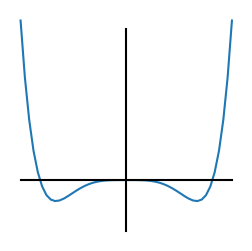

In [4]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
phi = np.linspace(-1.5, 1.5)
for v in ["v6"]:
    V = flow_potential(phi, type=v)
    ax.plot(phi, V, label=v)
ax.plot([-1.5, 1.5], [0, 0], color="black")
ax.plot([0, 0], [-0.2, 0.6], color="black")
ax.axis("off")
# ax.legend(frameon=False)

## 2 Open networks -- input / output capabilities

To achieve logic operations, it is necessary to include input / output capabilities. In this model, this is achieved by adding a boundary vertex energy to the Hamitonian:

$$
H_{\partial\Gamma} = \frac{1}{2} \mu \sum_{v\in\partial\Gamma_{\text{in}}} [(\mathbf{D}\cdot\mathbf{\Phi})_v + I_v] ^2
$$

In experiment, input and output are achieved by ratchet channels. In addition to boundary energy, an diode energy should be added to input and output edges to further ensure that no spurious backflow happens, e.g. flow out from an input. The diode energy $H_+ = 0$ if $\phi_e < 0$ for any $e\in E_+$, and zero otherwise.

The total energy of a flow network can be written as:

$$
H = H_0 + H_{\partial\Gamma} + H_+
$$

## 3 Energy landscapes of specific bifurcation designs

The most straight forward numerical method to compute and visualize the energy landscape is to visit all the possible configurations of the flows, say $\phi_i\in[-2, 2]$ where $i\in\{A, B, C\}$, and calculate the energy corresponding to each. However, this approach involves too many unrealistic configurations, since we already know from experiments that the continuity at the junction node must hold. For example, configuration like [1, 1, 1], where in each channel AN goes outward is clearly not a favored state. To simplify the computation and to highlight the effect of the double-well potential, we only vary two of the three flow rates independently, and set the third flow rate according to continuity $\sum\phi_i=0$. For example, we can start by setting $\phi_A$ and $\phi_B$ at certain values, then $\phi_C$ can be computed as $\phi_C = -\phi_A - \phi_B$.

### 3.1 Fully symmetric straight channels (model_01_S)

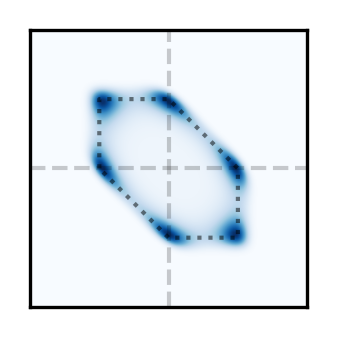

: 

In [16]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 30# lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(1.2, 1.2), dpi=300)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Blues", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=1, color="black", alpha=0.2)
ax.plot([0, 0], [-lim, lim], ls="--", lw=1, color="black", alpha=0.2)
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
# ax.set_xlabel("$\phi_2$")
# ax.set_ylabel("$\phi_1$")
ax.set_xticks([])
ax.set_yticks([])
# draw mass conservation line
x = [-1, -1, 0, 1, 1, 0, -1]
y = [0, 1, 1, 0, -1, -1, 0]
plt.plot(x, y, lw=1, color="black", alpha=0.5, ls=":")
fig.savefig("theo_prob_01.pdf")

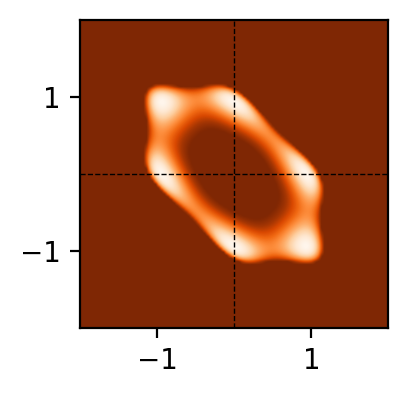

In [36]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20# lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(2, 2), dpi=200)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
ax.imshow(np.clip(H, -2,0), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-1, 1])
ax.set_yticks([-1, 1])
# ax.set_xticks([-2, 0, 2])
# ax.set_yticks([-2, 0, 2])
# ax.set_xlabel("$\phi_2$")
# ax.set_ylabel("$\phi_1$")

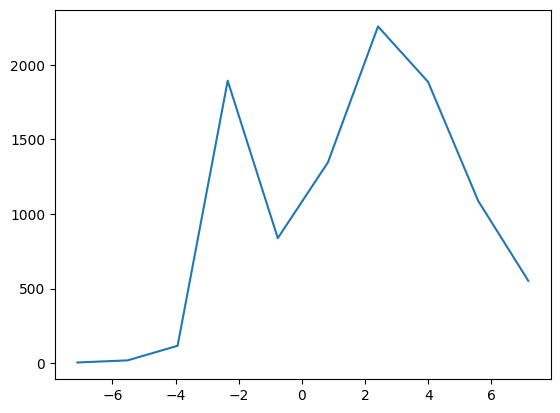

In [14]:
hist, bin_edges = np.histogram(np.log(H))
plt.plot(bin_edges[:-1], hist)

### 3.2 Fully symmetric channels with 3 partial ratchets (model_02_S)

In [6]:
def h_diode(flow, direction):
    """
    flow -- flow rate value
    """
    flow_x_direction = np.array(flow * direction)
    ind = flow_x_direction >= 0
    h = np.zeros(flow_x_direction.shape)
    h[~ind] = 1
    return h

In [111]:
isinstance(np.array([1,2]), np.ndarray)

True

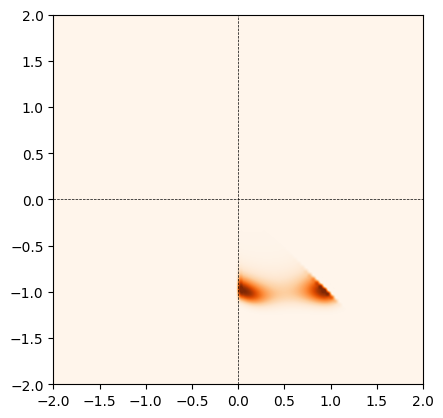

In [148]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20 # lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (2*flow_potential(p1, type="v6") + 2*flow_potential(p2, type="v6") + 2*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * ((p1+1)**2 + (p2-1)**2 + (p3-1)**2) + h_diode(p1, -1) + h_diode(p2, 1) +h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.3 Fully symmetric channels with 1 full ratchet (model_03_S)

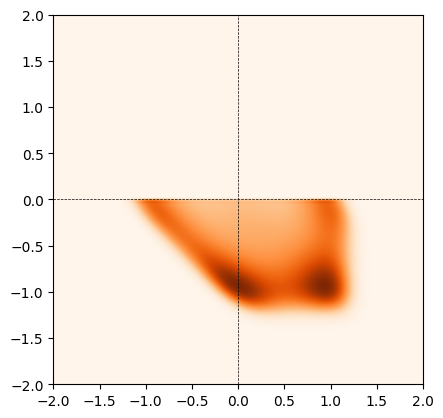

In [147]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.4 Asymmetric channels with 1 short outlet (model_04_L)

Text(0, 0.5, '$\\phi_1$')

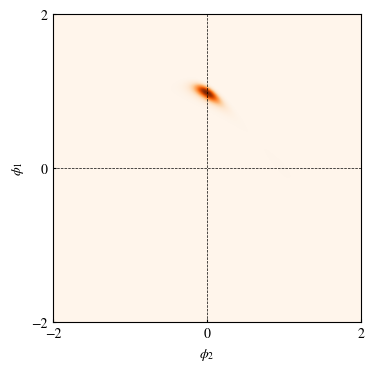

In [13]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 30 # lambda
b = 2 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 3*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p3+1)**2) + h_diode_soft(p3, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.5 Asymmetric channels with 1 full ratchet (model_05_L)

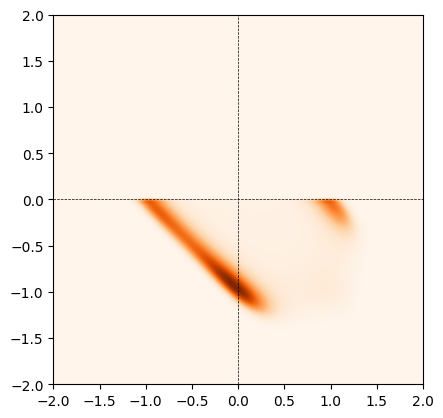

In [166]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.6 Asymmetric straight channels (model_06_L)

Text(0, 0.5, '$\\phi_1$')

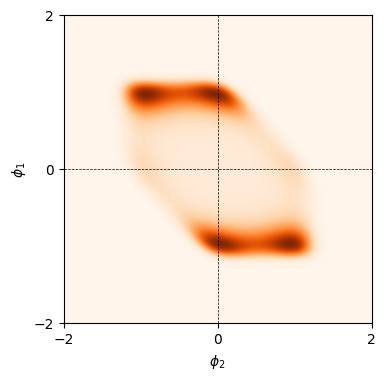

In [18]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4,4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.7 Asymmetric channels with 1 full ratchet, different angle (model_07_A)

Text(0, 0.5, '$\\phi_1$')

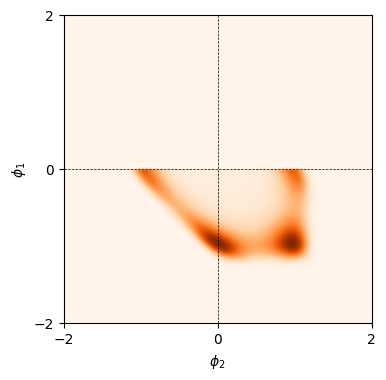

In [13]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 20 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
ax.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")

ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

### 3.8 Asymmetric channels with 1 full ratchet, different angles and lengths, together (model_08_A)

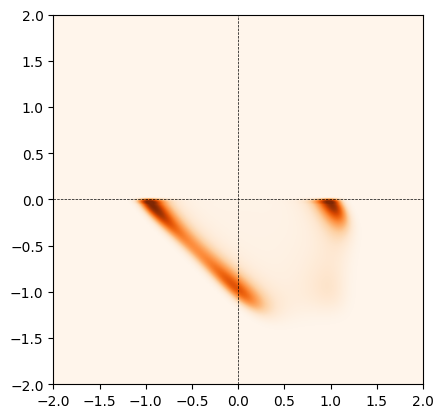

In [171]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + 2*flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.9 Asymmetric channels with 1 full ratchet, different angles and lengths, competition (model_09_A)

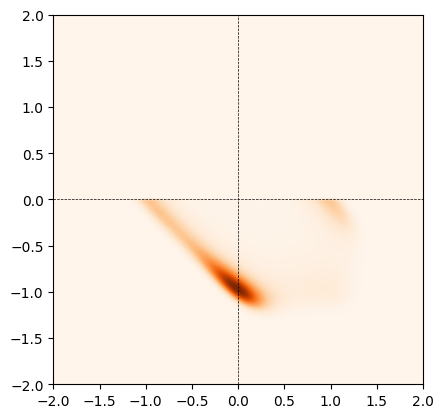

In [172]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (2*flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.10 Fully symmetric channels with 1 partial ratchet (model_10_S)

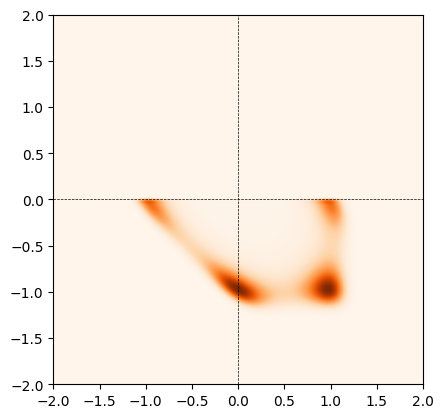

In [173]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (3*flow_potential(p1, type="v6") + 3*flow_potential(p2, type="v6") + 3*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.11 Fully symmetric straight channels (model_11_S)

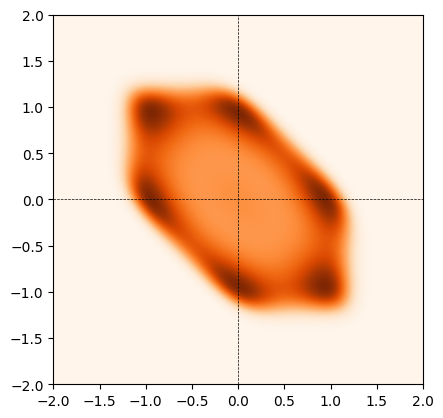

In [174]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) 
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.12 Asymmetric (model_12_L)

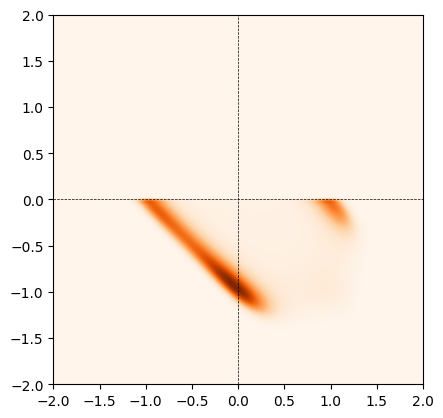

In [177]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.13 Asymmetric (model_13_L)

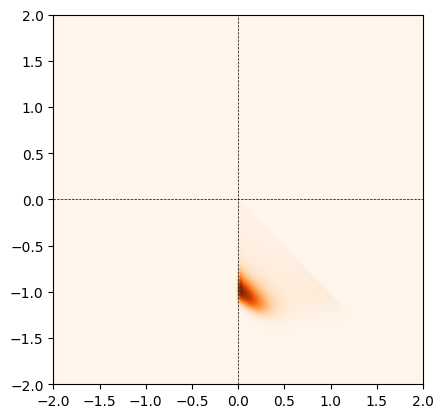

In [178]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 1 # mu
H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))**2) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1) + h_diode(p2, 1) + h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

### 3.14 Asymmetric (model_14_L)

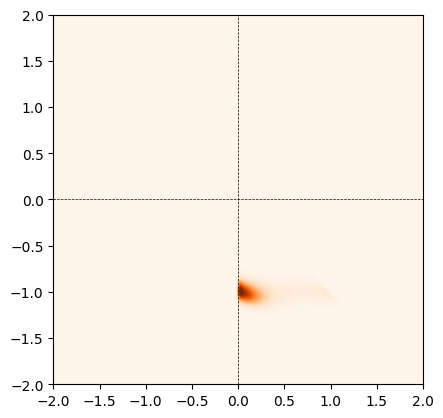

In [95]:
lim = 2
num_points = 100
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
# phi3 = np.linspace(-lim, lim)
D = np.array([-1, -1, -1])
a = 10 # lambda

H = np.zeros((len(phi1), len(phi2)))
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        p3 = - p1 - p2
        H[i, j] = a * (flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + 4*flow_potential(p3, type="v6")) + 1/2 * b * np.sum((p1+1)**2) + h_diode(p1, -1) + h_diode(p2, 1) + h_diode(p3, 1)
plt.imshow(np.exp(-H), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
plt.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
plt.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")

## 4 3D landscape project

In the previous section, we enforce continuity at the junction, so that the coupling term does not matter. In this section, we consider a 3D energy landscape, where continuity can be violated. The energy landscape will still be presented in 2D, which is the minimal projection of the along "A" axis.

In [46]:
from IPython.display import clear_output

Text(0, 0.5, '$\\phi_1$')

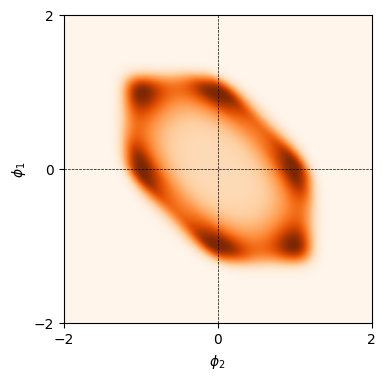

In [3]:
lim = 2
num_points = 50
phi1 = np.linspace(-lim, lim, num_points)
phi2 = np.linspace(-lim, lim, num_points)
phi3 = np.linspace(-lim, lim, num_points)
D = np.array([-1, -1, -1])
a = 10 # lambda
b = 100 # mu
H = np.zeros((len(phi1), len(phi2), len(phi3)))

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
for i, p1 in enumerate(phi1):
    for j, p2 in enumerate(phi2):
        for k, p3 in enumerate(phi3):
            H[i, j, k] = a * ( flow_potential(p1, type="v6") + flow_potential(p2, type="v6") + flow_potential(p3, type="v6") ) + 1/2 * b * np.sum((D * np.array([p1, p2, p3]))) ** 2

ax.imshow(np.exp(-H.min(axis=0)), origin="lower", extent=(-lim, lim, -lim, lim), cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticks([-2, 0, 2])
ax.set_yticks([-2, 0, 2])
ax.set_xlabel("$\phi_2$")
ax.set_ylabel("$\phi_1$")

## 5 Compact representation of the models

Previously, we represent the models in one *for* loop where 3 flows are treated seperatedly. The reusability of this form is limited. In this section, we want to identify all the input parameters of the model and represent the calculation in a function, where the loop is embedded.

The input parameters:

- channel length L: list of 3 elements, in mm
- channel directionality D: list of 3 elements. Each element can be +1, 0, -1. +1 means the flow will have an energy penalty if going in negative direction, and vice versa. If the element is 0, there is no directionality restriction applied to this channel.

We can use L and D to describe our bifurcation channel design. For example, 

    model_01 (full symmetric straight channels) 

        L: [1, 1, 1]
        D: [0, 0, 0]

    model_02

        L: [1, 1, 1]
        D: [-1, 1, 1]

In [8]:
a = np.random.rand(100, 100, 100, 3)
b = a.sum(axis=3)

In [10]:
b.shape

(100, 100, 100)

In [11]:
lim = 2
num_points = 50
phi = np.linspace(-lim, lim, num_points)
p1, p2, p3 = np.meshgrid(phi, phi, phi)

In [14]:
p1.shape

(50, 50, 50)

By constructing 3D meshgrids, we can evaluate the energy in a vectorized style, without going into a deep nested for loop. 

In the v0 theory, we use length double well potential, strong continuity constraint and hard diode potential. 

The length double well potential gives deeper well for longer channels, and therefore favors flow in longer channels. 

Strong continuity constraint requires that the system always obey it. 

hard diode potential prohibits strictly flows against the preferred direction. When flows are in the preferred directions, the diode term contributes no potential. 

More quantitatively, we assign coupling coefficients to each term. In order to differentiate the contributions from each factor, we assign coefficients of different orders of magnitude. We normally have 3 terms: double well, continuity and diode, to which we assign coefficients a, b and c, respectively. The strongest constraint, continuity is assigned b=1000. Diode is considered a weaker effect and is assigned c=100. Double well is considered the weakest factor, therefore a=10.

In [269]:
def energy_landscape(L, D, num_points=50):
    """model_v0
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality). In this model (v0), the straight channel behavior is governed by the order-6 potential. The ratchet is modeled as hard diode, where unfavored direction results in infinite energy penalty. This model is referred to as "hard | 6" for conciseness.
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi)
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v6"), axes=1)) \
        + 1/2 * b * np.tensordot(C, P, axes=1) ** 2 \
        + c * h_diode(np.tensordot(D, P, axes=1))

    return H.min(axis=1)

[Text(0, -2.0, ''),
 Text(0, -1.0, ''),
 Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, '')]

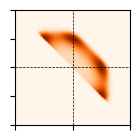

In [270]:
L = [1, 1, 1]
D = [-1, 0, 0]
H = energy_landscape(L, D)

lim = 2
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticklabels([])
ax.set_yticklabels([])

In theory v1, we introduce soft diode, where a diode channel favorites a certain flow rate (specified by the D vector) in a form of an order-2 potential. We keep the relative contributions of each term fixed. 

In [309]:
def energy_landscape_v1(L, D, num_points=50):
    """model_v1
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality). The diode is modeled as This model is referred to as "soft | 6".
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v6"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P in zip(D, P):
        H += c * h_diode_soft(_P, _D, gamma=1)

    return H.min(axis=0)

In [10]:
def h_diode_soft(flow, flow_preferred, gamma=1):
    """
    Order 2 diode potential. 

    H = gamma * (flow - flow_preferred) ** 2

    flow -- a multidimensional array
    flow_preferred -- a single number
    gamma -- an arbitrary coefficient
    """
    if flow_preferred == 0:
        return 0
    else:
        return gamma * (flow - flow_preferred) ** 2

[Text(0, -2.0, ''),
 Text(0, -1.0, ''),
 Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, '')]

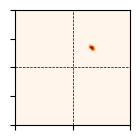

In [310]:
L = [0.5, 1.5, 0.5]
D = [-1, 1, 1]
H = energy_landscape_v1(L, D)

lim = 2
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
ax.set_xticklabels([])
ax.set_yticklabels([])

In [3]:
channels = {

    "model_01": {
        "L" : [1, 1, 1],
        "D" : [0, 0, 0],
        "RL" : [0, 0, 0]
    },

    "model_03": {
        "L" : [1, 1, 1],
        "D" : [-1, 0, 0],
        "RL" : [1, 0, 0]
    },

    "model_05": {
        "L" : [0.5, 1.5, 0.5],
        "D" : [-1, 0, 0],
        "RL" : [0.5, 0, 0]
    },

    "model_21": {
        "L" : [0.5, 1, 1],
        "D" : [-1, 0, 0],
        "RL" : [0.5, 0, 0]
    },

    "model_13": {
        "L" : [0.5, 1.5, 0.5],
        "D" : [-1, 1, 1],
        "RL" : [0.5, 1.5, 0.5]
    },

    "model_14": {
        "L" : [0.5, 1.5, 0.5],
        "D" : [-1, 1, 1],
        "RL" : [0.5, 0.5, 0.5]
    },

    "model_02": {
        "L" : [1, 1, 1],
        "D" : [-1, 1, 1],
        "RL" : [0.5, 0.5, 0.5]
    },

    "model_07": {
        "L" : [1, 1, 1],
        "D" : [-1, 0, 0],
        "RL" : [1, 0, 0]
    }
}


model_01


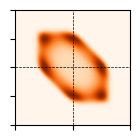

model_03


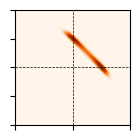

model_05


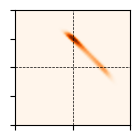

model_21


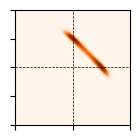

model_13


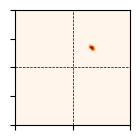

model_14


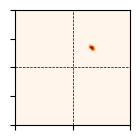

model_02


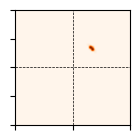

model_07


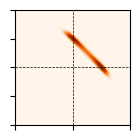

In [313]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    H = energy_landscape_v1(L, D)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [314]:
def energy_landscape_v2(L, D, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2
    for _D, _P in zip(D, P):
        H += c * h_diode_soft(_P, _D, gamma=1)

    return H.min(axis=0)

model_01


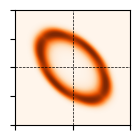

model_03


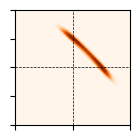

model_05


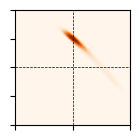

model_21


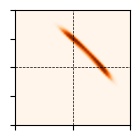

model_13


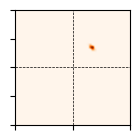

model_14


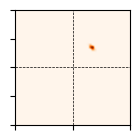

model_02


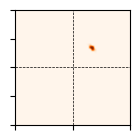

model_07


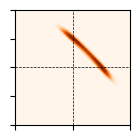

In [315]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    H = energy_landscape_v2(L, D)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [325]:
def energy_landscape_v3(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)
    RL = np.array(RL)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v6"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D*_RL, gamma=_RL)

    return H.min(axis=0)

model_01


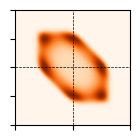

model_03


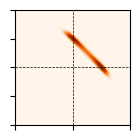

model_05


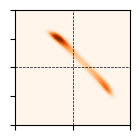

model_21


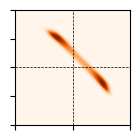

model_13


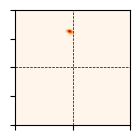

model_14


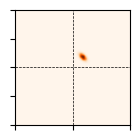

model_02


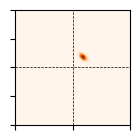

model_07


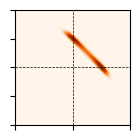

In [326]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v3(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [323]:
def energy_landscape_v4(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D*_RL, gamma=_RL)

    return H.min(axis=0)

model_01


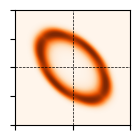

model_03


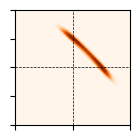

model_05


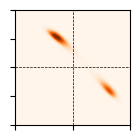

model_21


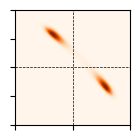

model_13


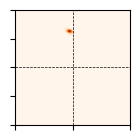

model_14


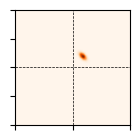

model_02


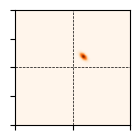

model_07


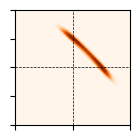

In [324]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v4(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [25]:
def energy_landscape_v5(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | L | 1

    S4LL
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v6"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D, gamma=_RL)

    return H.min(axis=0)

model_01


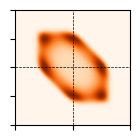

model_03


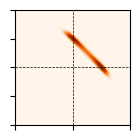

model_05


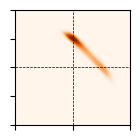

model_21


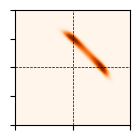

model_13


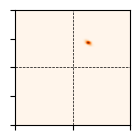

model_14


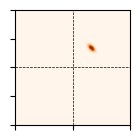

model_02


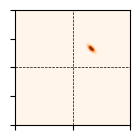

model_07


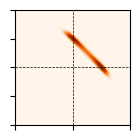

In [26]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v5(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [35]:
def energy_landscape_v6(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | 1 | L

    S4LL
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D, gamma=_RL)

    return H.min(axis=0)

model_01


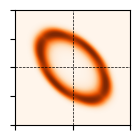

model_03


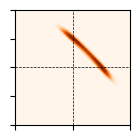

model_05


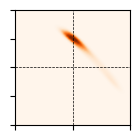

model_21


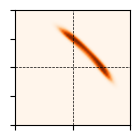

model_13


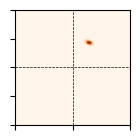

model_14


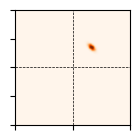

model_02


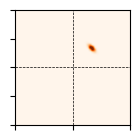

model_07


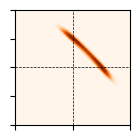

In [36]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v6(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [39]:
def energy_landscape_v7(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | 1 | L

    S4LL
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v6"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D*_RL, gamma=1)

    return H.min(axis=0)

model_01


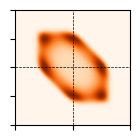

model_03


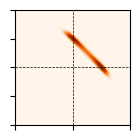

model_05


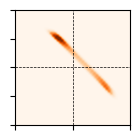

model_21


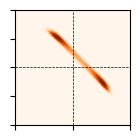

model_13


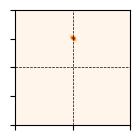

model_14


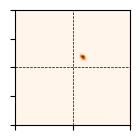

model_02


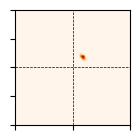

model_07


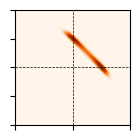

In [40]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v7(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [43]:
def energy_landscape_v8(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | 1 | L

    S4LL
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D*_RL, gamma=1)

    return H.min(axis=0)

model_01


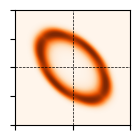

model_03


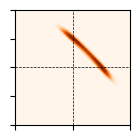

model_05


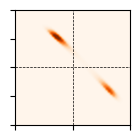

model_21


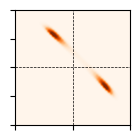

model_13


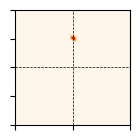

model_14


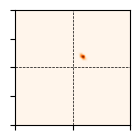

model_02


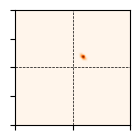

model_07


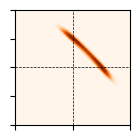

In [44]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v8(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [57]:
def energy_landscape_v9(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | 1 | L | I

    S41LI
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 1000
    c = 100
    
    H = a * (np.tensordot(L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D, gamma=_RL)

    H += b * (P[0] + 1) ** 2

    return H.min(axis=0)

model_01


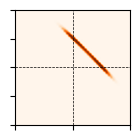

model_03


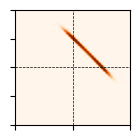

model_05


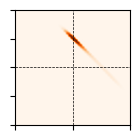

model_21


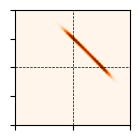

model_13


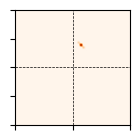

model_14


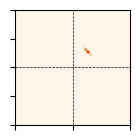

model_02


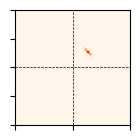

model_07


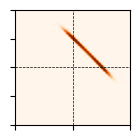

In [58]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v9(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)

In [128]:
def energy_landscape_v10(L, D, RL, num_points=50):
    """
    Compute the energy landscape for a channel design specified by vectors L (length) and D (directionality).
    
    soft | 4 | 1 | L | I

    S41LI
    """
    lim = 2
    phi = np.linspace(-lim, lim, num_points)
    p1, p2, p3 = np.meshgrid(phi, phi, phi, indexing="ij")
    P = np.array([p1, p2, p3])
    C = np.array([-1, -1, -1])
    L = np.array(L)
    D = np.array(D)

    a = 10
    b = 40
    c = 20
    
    H = a * (np.tensordot(L/L, flow_potential(P, type="v4"), axes=1)) \
        + b * np.tensordot(C, P, axes=1) ** 2 
    for _D, _P, _RL in zip(D, P, RL):
        H += c * h_diode_soft(_P, _D, gamma=_RL)

    if D[0] != 0:
        H += b * (P[0] - D[0]) ** 2

    return H.min(axis=0)

model_01


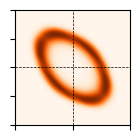

model_03


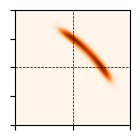

model_05


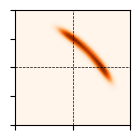

model_21


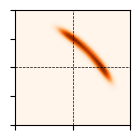

model_13


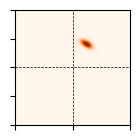

model_14


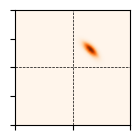

model_02


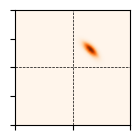

model_07


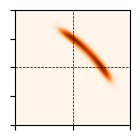

In [129]:
lim = 2
for model in channels:
    L = channels[model]["L"]
    D = channels[model]["D"]
    RL = channels[model]["RL"]
    H = energy_landscape_v10(L, D, RL)
    print(model)
    fig, ax = plt.subplots(figsize=(1.5, 1.5))
    ax.imshow(np.exp(-H), extent=(-lim, lim, -lim, lim), origin="lower", cmap="Oranges", interpolation="spline16")
    ax.plot([-lim, lim], [0, 0], ls="--", lw=0.5, color="black")
    ax.plot([0, 0], [-lim, lim], ls="--", lw=0.5, color="black")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.pause(.001)